In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [ ]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [ ]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=30,validation_split=0.1)

Epoch 1/30
83/83 [==============================] - 84s 1s/step - loss: 0.1062 - accuracy: 0.9633 - val_loss: 0.4383 - val_accuracy: 0.9082
Epoch 2/30
83/83 [==============================] - 85s 1s/step - loss: 0.0630 - accuracy: 0.9788 - val_loss: 0.4873 - val_accuracy: 0.8844
Epoch 3/30
83/83 [==============================] - 84s 1s/step - loss: 0.0697 - accuracy: 0.9777 - val_loss: 0.3650 - val_accuracy: 0.8810
Epoch 4/30
83/83 [==============================] - 84s 1s/step - loss: 0.0468 - accuracy: 0.9811 - val_loss: 0.5843 - val_accuracy: 0.8776
Epoch 5/30
83/83 [==============================] - 84s 1s/step - loss: 0.0660 - accuracy: 0.9792 - val_loss: 0.5298 - val_accuracy: 0.8810
Epoch 6/30
83/83 [==============================] - 84s 1s/step - loss: 0.0635 - accuracy: 0.9796 - val_loss: 0.4434 - val_accuracy: 0.8844
Epoch 7/30
83/83 [==============================] - 84s 1s/step - loss: 0.1031 - accuracy: 0.9641 - val_loss: 0.4482 - val_accuracy: 0.8571
Epoch 8/30
83/83 [==

In [ ]:
history = model.fit(X_train,y_train,epochs=30,validation_split=0.1)

Epoch 1/10
83/83 [==============================] - 82s 991ms/step - loss: 0.1619 - accuracy: 0.9448 - val_loss: 0.3114 - val_accuracy: 0.8980
Epoch 2/10
83/83 [==============================] - 82s 990ms/step - loss: 0.1481 - accuracy: 0.9485 - val_loss: 0.2673 - val_accuracy: 0.9116
Epoch 3/10
83/83 [==============================] - 83s 1s/step - loss: 0.1306 - accuracy: 0.9603 - val_loss: 0.2657 - val_accuracy: 0.8980
Epoch 4/10
83/83 [==============================] - 83s 999ms/step - loss: 0.0982 - accuracy: 0.9644 - val_loss: 0.3525 - val_accuracy: 0.8946
Epoch 5/10
83/83 [==============================] - 82s 992ms/step - loss: 0.1075 - accuracy: 0.9625 - val_loss: 0.3092 - val_accuracy: 0.8912
Epoch 6/10
83/83 [==============================] - 82s 990ms/step - loss: 0.1004 - accuracy: 0.9678 - val_loss: 0.3099 - val_accuracy: 0.8810
Epoch 7/10
83/83 [==============================] - 83s 994ms/step - loss: 0.0728 - accuracy: 0.9769 - val_loss: 0.3818 - val_accuracy: 0.9014
Ep

In [ ]:
model.save('brain_tumor_classifier.h5')


In [ ]:
# os.makedirs('weights_directory', exist_ok=True)

# # Define the filepath to save the best weights
# checkpoint_filepath = 'best_weights_brain_tumor_classifier.h5'

# # Create a ModelCheckpoint callback to save the best weights
# checkpoint = ModelCheckpoint(checkpoint_filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [ ]:
# model.load_weights('best_weights_brain_tumor_classifier.h5')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

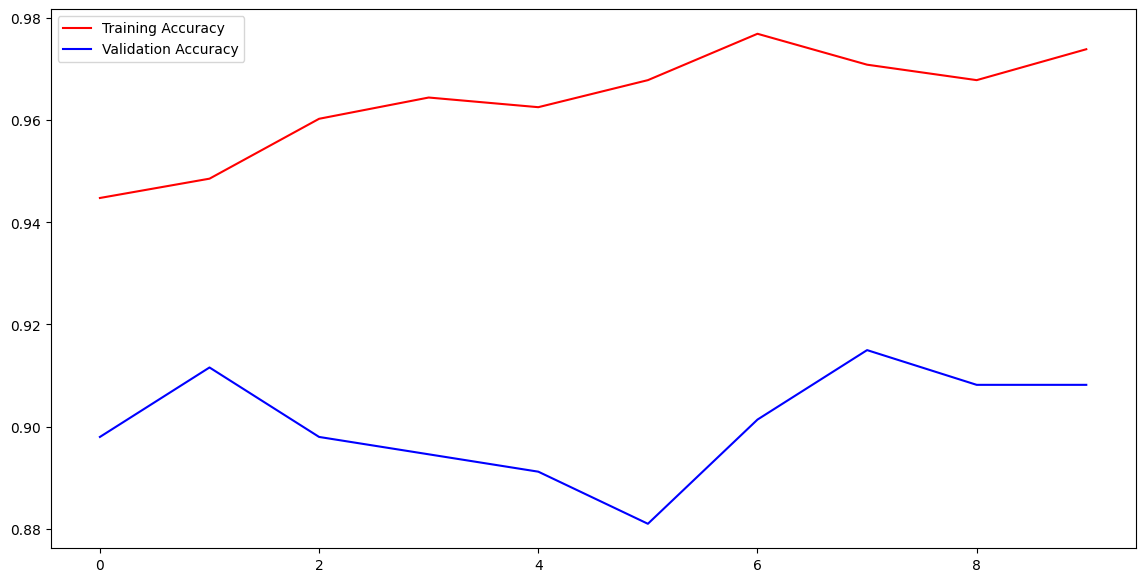

In [ ]:
#model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

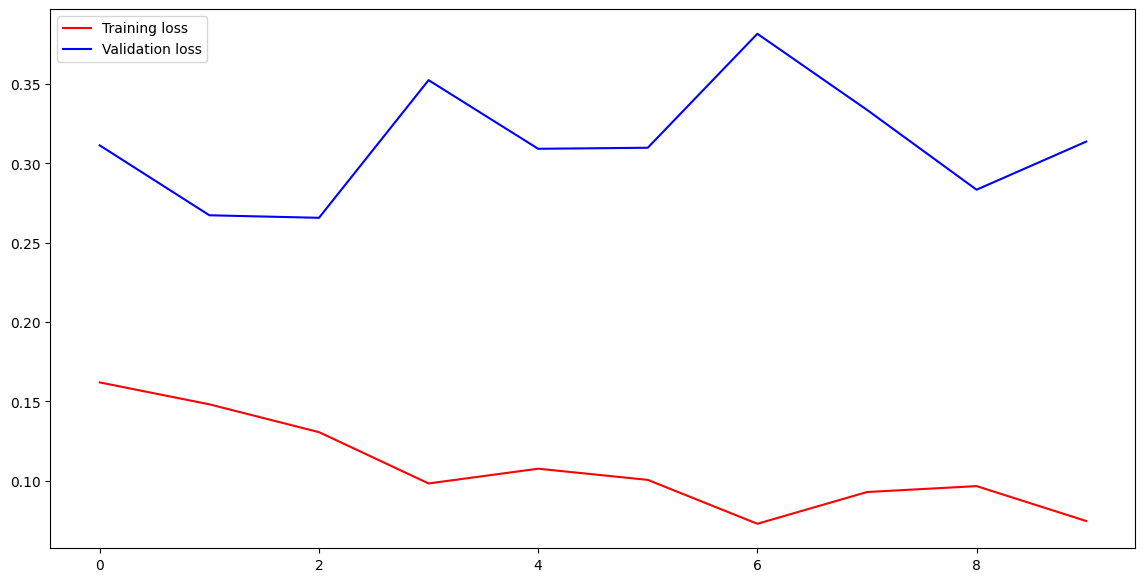

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

Prediction

In [ ]:
img = cv2.imread('/content/drive/MyDrive/brain-tumor-classification-mri/Training/pituitary_tumor/p (128).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

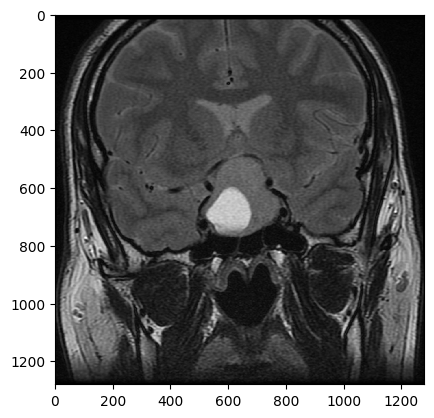

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/brain-tumor-classification-mri/Training/pituitary_tumor/p (128).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 171ms/step


3